#  Initial Data Inspection

* Load the data from my training dataset and utilize data.shape to ascertain the number of rows and columns. This provides a quick understanding of the dataset's size and complexity.
* Obtain a summary of the data frame, identifying columns with missing values and understanding the types of data (numerical, categorical) present.
* View data rows to identify the nature of the data in each row.
* Group the data based on the 'overall' column, which appears to represent ratings or a similar metric.



In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/train.csv')


In [ ]:
print(data.shape)  # Prints the number of rows and columns
print(data.info())  # Provides a concise summary of the DataFrame


(370863, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370863 entries, 0 to 370862
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  370863 non-null  int64 
 1   Review   370855 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.7+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(data.head())

   overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.groupby('overall').describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review                         
          count  unique        top  freq
overall                                 
1         10772    9382  Too small    12
2          9624    8421         Ok    20
3         21470   18288         ok   159
4         45831   36791       good   286
5        283158  204530      great  1718

* Data Visualization

<Axes: ylabel='percent'>

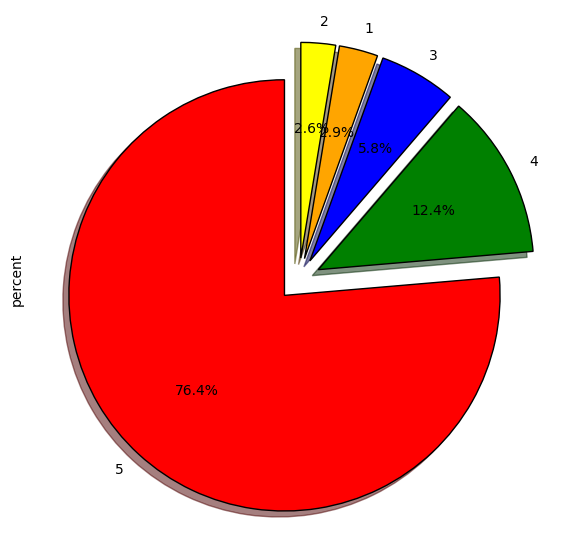

In [ ]:
import matplotlib.pyplot as plt

ig = plt.figure(figsize=(7,7))

colors = ("red","green","blue","orange","yellow")

wp = {'linewidth':1,'edgecolor':'black'}

tags = data['overall'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie',autopct="%1.1f%%", shadow=True,colors=colors,startangle=90,explode = explode ,wedgeprops=wp,label="percent")

Text(0, 0.5, 'Length')

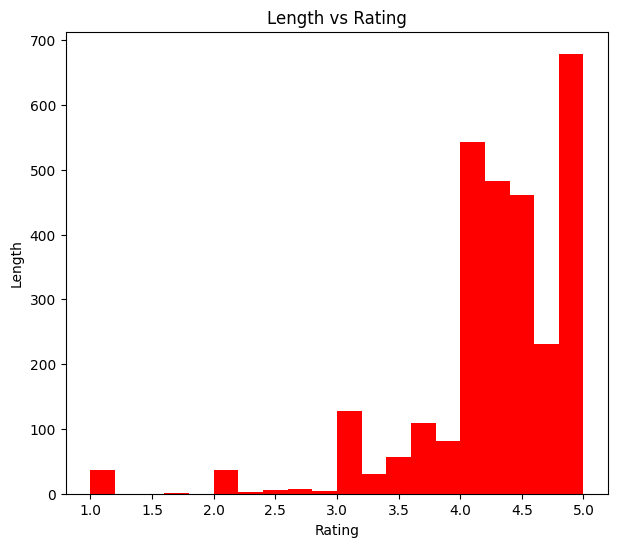

In [ ]:
data['length'] = data['Review'].apply(len)
data.groupby('length')['overall'].mean().plot.hist(color = 'red', figsize = (7,6),bins = 20)
plt.title('Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Length')

In [ ]:
import pandas as pd
import numpy as np

# Creating a sample dataset with a numerical feature
np.random.seed(42)  # For reproducible results
data = pd.DataFrame({
    'numerical_feature': np.random.normal(loc=50, scale=15, size=1000),  # 1000 random numbers
    'category': ['A', 'B'] * 500  # 1000 alternating categorical values
})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


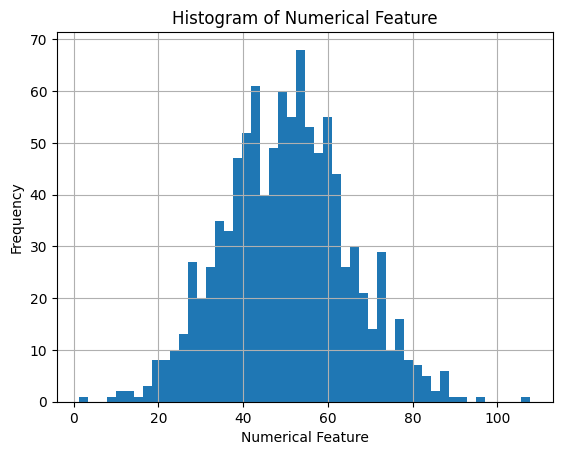

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


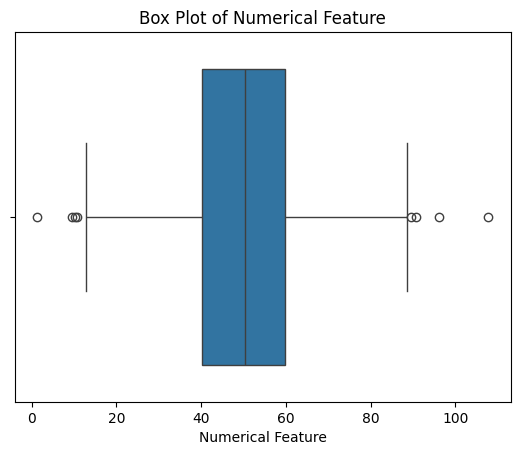

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of the numerical feature
data['numerical_feature'].hist(bins=50)
plt.title('Histogram of Numerical Feature')
plt.xlabel('Numerical Feature')
plt.ylabel('Frequency')
plt.show()

# Example: Box plot of the numerical feature
sns.boxplot(x=data['numerical_feature'])
plt.title('Box Plot of Numerical Feature')
plt.xlabel('Numerical Feature')
plt.show()


In [ ]:
print(data.columns)


Index(['numerical_feature', 'category'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


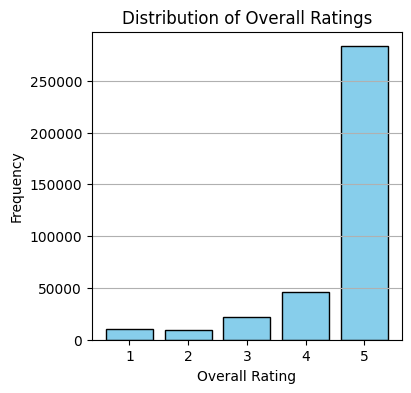

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['overall'].value_counts().sort_index()
plt.figure(figsize=(4, 4))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.xticks(rating_counts.index)
plt.grid(axis='y')
plt.show()

In [ ]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def clean_text(sen):
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove special characters
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Remove single character words
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove \n
    sentence = re.sub(r'\n', ' ', sentence)

    # Remove ()
    sentence = re.sub(r'\(\)', ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['reviews'] = data['Review'].astype(str).apply(clean_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


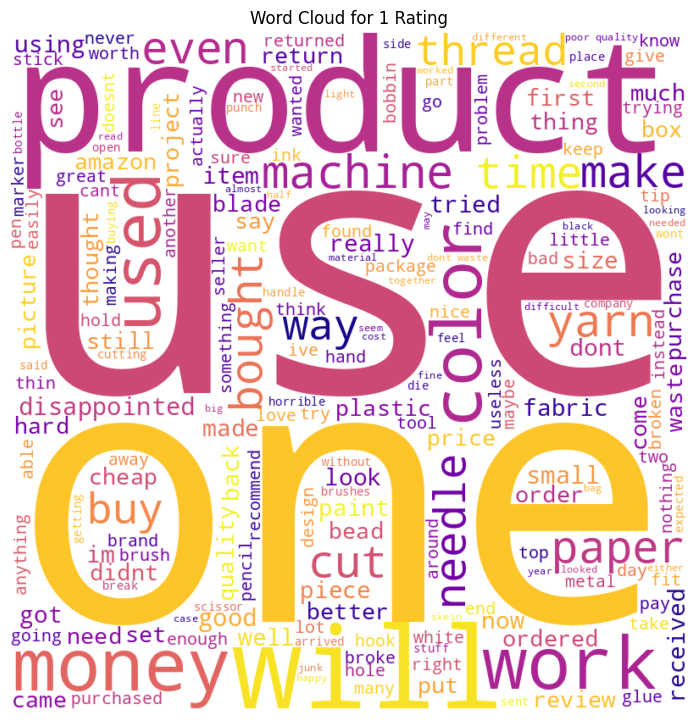

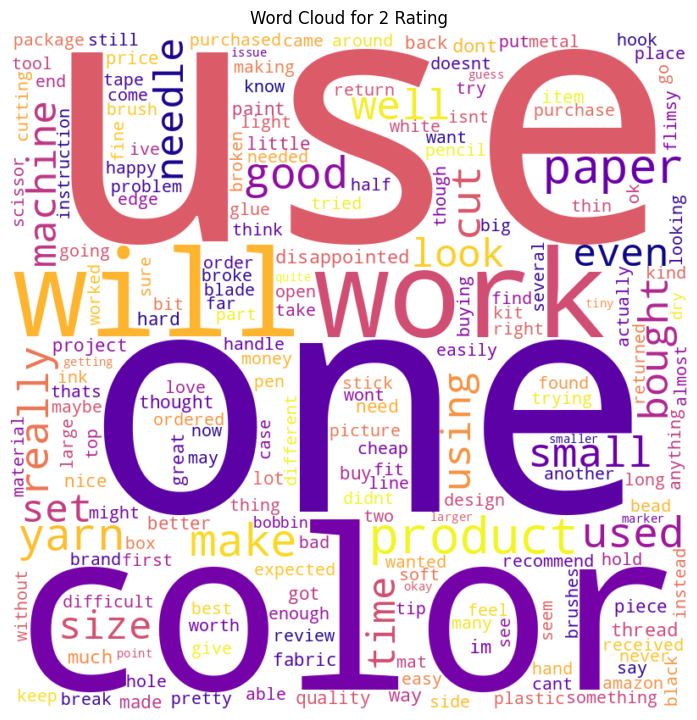

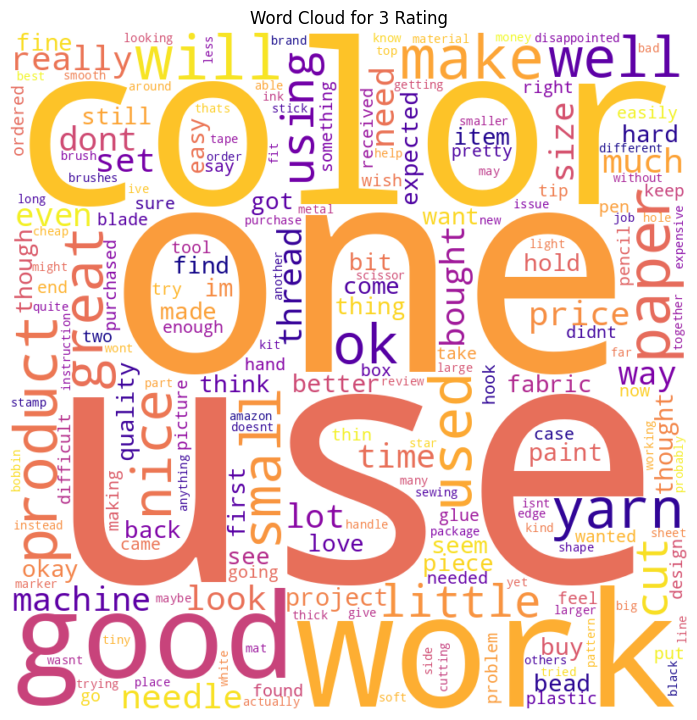

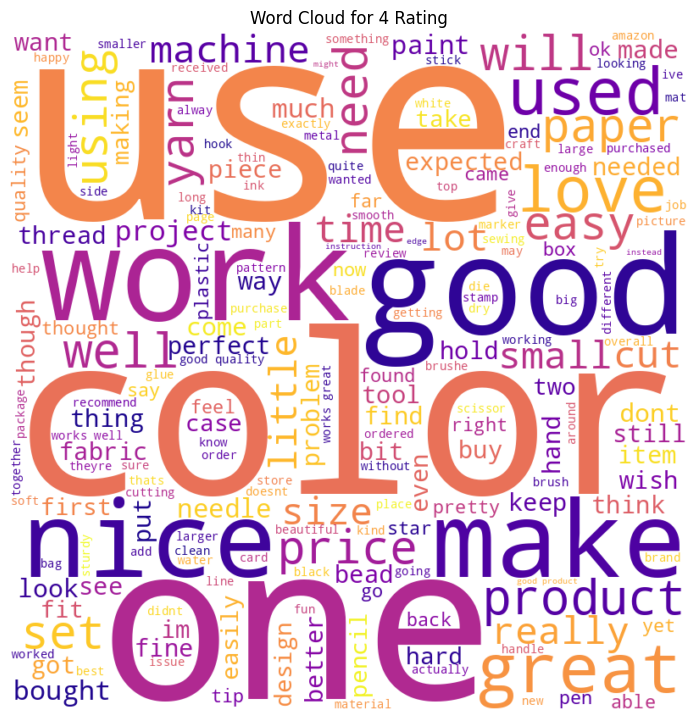

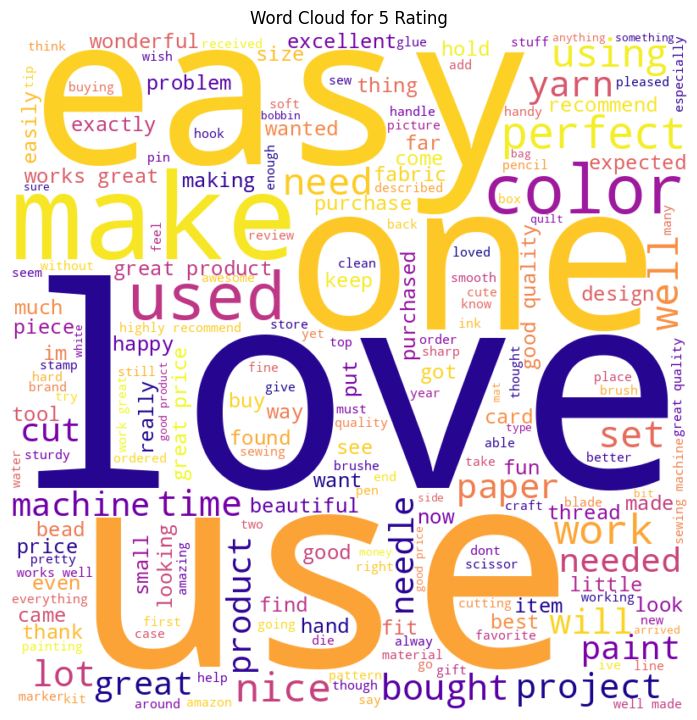

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate and display word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=9,colormap='plasma').generate(text)
    plt.figure(figsize=(7, 7), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

# Filter and aggregate text for each sentiment category
ratings = [1,2,3,4,5]
for rating in ratings:
    sentiment_text = ' '.join(data[data['overall'] == rating]['reviews'].tolist())
    generate_word_cloud(sentiment_text, f"Word Cloud for {rating} Rating")


In [ ]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short
from gensim import corpora, models
import pyLDAvis.gensim_models
import pyLDAvis

# Customize preprocessing filters
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short]

def preprocess(text):
    return preprocess_string(text, CUSTOM_FILTERS)

def train_lda_model(reviews):
    processed_docs = [preprocess(doc) for doc in reviews]

    # Create a dictionary representation of the documents.
    dictionary = corpora.Dictionary(processed_docs)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

    # Bag-of-words representation of the documents.
    corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

    # Train LDA model.
    lda_model = models.LdaModel(corpus=corpus, num_topics=15, id2word=dictionary, passes=10)

    return lda_model, corpus, dictionary

def visualize_lda(lda_model, corpus, dictionary):
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    return pyLDAvis.display(vis)

def separate_ratings(df):
    low_rating_reviews = df[df['overall'] ==1]['reviews']
    high_rating_reviews = df[df['overall'] == 5]['reviews']
    return low_rating_reviews, high_rating_reviews

low_rating_reviews, high_rating_reviews = separate_ratings(data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train LDA model and visualize for high ratings
high_lda_model, high_corpus, high_dictionary = train_lda_model(high_rating_reviews)
high_lda_vis = visualize_lda(high_lda_model, high_corpus, high_dictionary)
high_lda_vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train LDA model and visualize for low ratings
low_lda_model, low_corpus, low_dictionary = train_lda_model(low_rating_reviews)
low_lda_vis = visualize_lda(low_lda_model, low_corpus, low_dictionary)
low_lda_vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


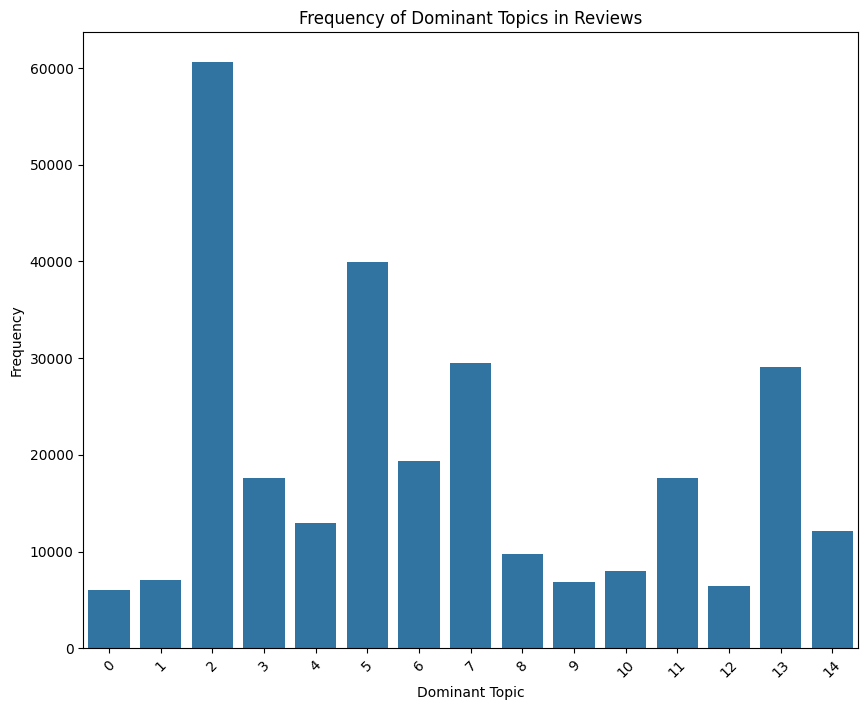

In [ ]:
import pandas as pd
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short
from gensim import corpora, models
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code to load data, preprocess, train LDA model, etc.

# Assuming 'data' is your DataFrame and it has a 'Review' column
# Let's pretend 'data' is loaded and 'lda_model', 'corpus', and 'dictionary' are already defined

def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # Dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                temp_df = pd.DataFrame([int(topic_num), round(prop_topic,4), topic_keywords], index=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']).T
                sent_topics_df = pd.concat([sent_topics_df, temp_df], axis=0)
            else:
                break

    sent_topics_df.reset_index(drop=True, inplace=True)

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents.rename("Text")], axis=1)
    return sent_topics_df


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Review'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Assuming 'data' DataFrame has an index that matches with 'Document_No'
data = data.reset_index()  # Reset index to make sure it aligns
data['Dominant_Topic'] = df_dominant_topic['Dominant_Topic']

# Now, visualize the frequency of dominant topics
topic_counts = data['Dominant_Topic'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Frequency of Dominant Topics in Reviews')
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Topic Modelling of High and Low Ratings

Data Preparation:
1. Install all required packages for the module. Load the data from train.csv, then clean and prepare each review for analysis using the processing module. This involves:
   - Converting the text to lowercase for consistency.
   - Removing all non-alphabetical characters to eliminate punctuation and numbers, focusing only on words.
   - Tokenizing the text into individual words using word_tokenize.
   - Removing stopwords (common words that usually don't contribute to the meaning of a sentence) to reduce noise in the data.
   - Lemmatizing words to their base form to consolidate different forms of the same word.

2. Train the module using TF-IDF. Take a list of reviews and identify 15 topics. Transform the collection of documents represented as a list of word occurrences using the dictionary. Apply TF-IDF to the corpus to weight words based on their importance across documents.

3. Separate reviews based on their star rating. This enables comparison between five-star and one-star rating documents. Utilize various types of topic modeling such as LDA.

4. Print the output to identify the modules and types of topics. Utilize visualizations such as pyLDAvis.

In this case, PyLDAvis proves to be the perfect chart to display this type of data and facilitates clear exploration of the types of topics.



In [ ]:
# !pip install pyldavis
# !pip install gensim
# !pip install nltk


In [ ]:
# !pip install pandas nltk gensim pyLDAvis scikit-learn


In [ ]:
# Ensure all necessary packages are installed
# !pip install pandas nltk gensim pyLDAvis scikit-learn

import pandas as pd
import re
from gensim import corpora, models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('/train.csv')  # Update the path to your dataset

def preprocess_text(text):
    text = str(text).lower()  # Convert any input to string and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def train_lda_with_tfidf(reviews, num_topics=15):
    processed_reviews = [preprocess_text(review) for review in reviews]
    dictionary = corpora.Dictionary(processed_reviews)
    corpus = [dictionary.doc2bow(review) for review in processed_reviews]
    # Apply TF-IDF transformation
    tfidf = TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    # Train LDA model on the TF-IDF transformed corpus
    lda_model = LdaModel(corpus=corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=10)
    return lda_model, corpus_tfidf, dictionary

def visualize_lda_model(lda_model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
    return pyLDAvis.display(vis)

# Separate reviews by rating
five_star_reviews = data[data['overall'] == 5]['Review'].tolist()
one_star_reviews = data[data['overall'] == 1]['Review'].tolist()

# Train LDA models with TF-IDF for five-star and one-star reviews
five_star_lda_model, five_star_corpus_tfidf, five_star_dictionary = train_lda_with_tfidf(five_star_reviews, num_topics=15)
one_star_lda_model, one_star_corpus_tfidf, one_star_dictionary = train_lda_with_tfidf(one_star_reviews, num_topics=15)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Visualize the LDA models (execute each in a separate Jupyter Notebook cell for interactivity)
visualize_lda_model(five_star_lda_model, five_star_corpus_tfidf, five_star_dictionary)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
visualize_lda_model(one_star_lda_model, one_star_corpus_tfidf, one_star_dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# GRU model achieved the highest performance on the Kaggle competition.
Acurracy 0.8206

batch size = 32

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['Review'], test_df['Review']], ignore_index=True)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['Review'])
test_sequences = tokenizer.texts_to_sequences(test_df['Review'])

max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    GRU(64, dropout=0.2, recurrent_dropout=0.2),  # Using GRU instead of LSTM
    Dense(5, activation='softmax')  # Use 5 neurons for 5 classes
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=32, epochs=3, validation_data=(X_val, y_val))

# Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('/content/drive/MyDrive/submission.csv', index=False)


Epoch 1/3
10431/10431 [==============================] - 1684s 161ms/step - loss: 0.5586 - accuracy: 0.7980 - val_loss: 0.5284 - val_accuracy: 0.8059
Epoch 2/3
10431/10431 [==============================] - 1636s 157ms/step - loss: 0.4960 - accuracy: 0.8183 - val_loss: 0.5062 - val_accuracy: 0.8137
Epoch 3/3
1159/1159 [==============================] - 22s 19ms/step
              precision    recall  f1-score   support

     Class 1       0.58      0.65      0.61      1091
     Class 2       0.41      0.20      0.27       998
     Class 3       0.50      0.42      0.46      2212
     Class 4       0.53      0.20      0.29      4634
     Class 5       0.87      0.98      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.58      0.49      0.51     37087
weighted avg       0.78      0.82      0.79     37087

Validation Accuracy: 0.8169
3864/3864 [==============================] - 72s 19ms/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # or 'val_accuracy'
    patience=1,         # Number of epochs to wait after min has been hit
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [ ]:
model.fit(X_train_split, y_train_split, batch_size=32, epochs=2, validation_data=(X_val, y_val),callbacks=[early_stopping])
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('Gru_submission.csv', index=False)


Epoch 1/2
10431/10431 [==============================] - 1670s 160ms/step - loss: 0.4459 - accuracy: 0.8384 - val_loss: 0.5103 - val_accuracy: 0.8174
Epoch 2/2
1159/1159 [==============================] - 21s 18ms/step
              precision    recall  f1-score   support

     Class 1       0.56      0.65      0.60      1091
     Class 2       0.42      0.24      0.31       998
     Class 3       0.50      0.39      0.44      2212
     Class 4       0.53      0.22      0.31      4634
     Class 5       0.87      0.98      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.58      0.50      0.52     37087
weighted avg       0.78      0.82      0.79     37087

Validation Accuracy: 0.8174
3864/3864 [==============================] - 74s 19ms/step


The training accuracy has increased from 83.00% to 84.51% across the sessions.
The validation accuracy also increased from 81.69% to 81.92%.
These improvements suggest that the model continues to learn and generalize with additional training.
The validation loss has slightly increased from 0.5052 to 0.5133 from the first three epochs to the next two epochs, which could be a sign that the model is beginning to overfit, or it could simply be variability in the validation set performance but early stopping was in action but it didinot intrupt the model so no overfit but might happen if increased training

Class 1: Slight decreases in precision but increases in recall, leading to a similar F1-score.
Class 2: An improvement in recall and a better F1-score in the extended training session.
Class 3 and Class 4: Minor improvements in recall and F1-scores with the extra training.
Class 5: Consistently high performance, suggesting that the model is very good at predicting this class.

#Bidirectional GRU model ranked as the second highest model in the Kaggle competition.
Accuracy for 70 % is .81993

batch size = 64

In [ ]:
 # Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['Review'], test_df['Review']], ignore_index=True)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['Review'])
test_sequences = tokenizer.texts_to_sequences(test_df['Review'])

max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2)),  # Updated to Bidirectional GRU
    Dense(5, activation='softmax')  # Use 5 neurons for 5 classes
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val))

# Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Classification report
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission_gru.csv', index=False)


Epoch 1/3
5216/5216 [==============================] - 1915s 366ms/step - loss: 0.5652 - accuracy: 0.7953 - val_loss: 0.5290 - val_accuracy: 0.8048
Epoch 2/3
5216/5216 [==============================] - 1954s 375ms/step - loss: 0.5031 - accuracy: 0.8153 - val_loss: 0.5093 - val_accuracy: 0.8120
Epoch 3/3
1159/1159 [==============================] - 40s 34ms/step
              precision    recall  f1-score   support

     Class 1       0.61      0.58      0.59      1091
     Class 2       0.44      0.22      0.29       998
     Class 3       0.47      0.48      0.47      2212
     Class 4       0.54      0.19      0.28      4634
     Class 5       0.87      0.98      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.59      0.49      0.51     37087
weighted avg       0.78      0.82      0.79     37087

Validation Accuracy: 0.8166
3864/3864 [==============================] - 134s 35ms/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # or 'val_accuracy'
    patience=0,         # Number of epochs to wait after min has been hit
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val),callbacks=[early_stopping])

# Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Classification report
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission_bigru.csv', index=False)

Epoch 1/3
5216/5216 [==============================] - 1961s 376ms/step - loss: 0.4501 - accuracy: 0.8360 - val_loss: 0.5182 - val_accuracy: 0.8161
Epoch 2/3
5216/5216 [==============================] - 1985s 381ms/step - loss: 0.4285 - accuracy: 0.8448 - val_loss: 0.5109 - val_accuracy: 0.8187
Epoch 3/3
1159/1159 [==============================] - 42s 37ms/step
              precision    recall  f1-score   support

     Class 1       0.54      0.67      0.60      1091
     Class 2       0.44      0.24      0.31       998
     Class 3       0.51      0.39      0.44      2212
     Class 4       0.52      0.25      0.34      4634
     Class 5       0.88      0.97      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.58      0.50      0.52     37087
weighted avg       0.79      0.82      0.79     37087

Validation Accuracy: 0.8187
3864/3864 [==============================] - 139s 36ms/step


The training accuracy increased from 83.60% to 85.23% over these epochs, showing that the model continues to learn and improve its performance on the training data.
The validation accuracy also increased slightly, peaking at 81.87% in the second epoch before a marginal decrease to 81.86% in the third epoch. This slight fluctuation suggests that the model's ability to generalize to unseen data is stabilizing.
The validation loss decreased in the second epoch but then increased in the third epoch to 0.5219. This rise in loss at the end could indicate the beginning of overfitting,
Class 5, likely the majority class given its high metrics, continues to dominate the model's accuracy.
Class 1 shows a good balance between precision and recall, indicating improved ability to predict this class correctly.
Class 2 and Class 3 have moderate scores, with Class 2 showing a notable issue with low recall, indicating many false negatives.
Class 4, despite having a fair precision, has a low recall, suggesting the model struggles to identify true positives effectively.


In [ ]:
model.save("bigru.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 100, 128)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1355141 (5.17 MB)
Trainable params: 1355141 (5.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# All Experiments for F21AA Coursework 2
Each section is a different notebook merged together.

# Logistic Regression with SMOTE.

In [ ]:
import pandas as pd

# Load train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [ ]:

train.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [ ]:
train.describe()

overall
count  370863.000000
mean        4.566600
std         0.930377
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370863 entries, 0 to 370862
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  370863 non-null  int64 
 1   Review   370863 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.7+ MB


In [ ]:
train.groupby('overall').describe()

Review                         
          count  unique        top  freq
overall                                 
1         10772    9382  Too small    12
2          9624    8421         Ok    20
3         21470   18288         ok   159
4         45832   36792       good   286
5        283165  204531      great  1718

In [ ]:
train.loc[0]

overall                                                    5
Review     I love these glitter pens. They sparkle deligh...
Name: 0, dtype: object

In [ ]:
train.loc[1]

overall                                                    5
Review     It works well with my machine.  I use mostly c...
Name: 1, dtype: object

In [ ]:
train.loc[1,'Review']

'It works well with my machine.  I use mostly cones on it.'

In [ ]:
train.loc[0,'Review']

"I love these glitter pens. They sparkle delightfully on the page, and they're brilliantly coloured even without the glitter! The darker colours do bleed through thin paper, however."

2.1 Create  a train-test split and check label distibuition and size of the splits.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
to_train, to_test=train_test_split(train, test_size=0.25, random_state=10)

In [ ]:

to_train.groupby('overall').describe() # check the label distribuition in your training data

Review                         
          count  unique        top  freq
overall                                 
1          8091    7224  too small     8
2          7194    6466         Ok    16
3         16112   14160         ok   117
4         34211   28400       good   211
5        212539  158937      great  1278

In [ ]:
to_test.groupby('overall').describe() # check the label distribuition in your test data

Review                       
         count unique        top freq
overall                              
1         2681   2578  Too small    5
2         2430   2340         Ok    4
3         5358   5002         ok   42
4        11621  10442       good   75
5        70626  58237      great  440

In [ ]:
to_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92716 entries, 360893 to 325824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   overall  92716 non-null  int64 
 1   Review   92716 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
to_test.head()

overall                                             Review
360893        5  It was two days late is the only reason I did ...
93011         5                                               cool
239295        5                                         Great item
75952         5            Really helped with my quilting project.
327569        5  Love it! Everyone kept telling me I needed one...

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'to_train' and 'to_test' DataFrames are defined

# Splitting data into train and test
X_train = to_train['Review']
y_train = to_train['overall']

X_test = to_test['Review']
y_test = to_test['overall']

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))  # Using trigrams

# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Use the same vectorizer to transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Define Logistic Regression classifier
logistic_clf = LogisticRegression(max_iter=1000)

# Fit the model on resampled data
logistic_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred_logistic = logistic_clf.predict(X_test_tfidf)
print("Classification Report for to_test:")
print(classification_report(y_test, y_pred_logistic))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for to_test:
              precision    recall  f1-score   support

           1       0.39      0.62      0.48      2681
           2       0.21      0.43      0.28      2430
           3       0.32      0.44      0.37      5358
           4       0.28      0.41      0.33     11621
           5       0.92      0.77      0.84     70626

    accuracy                           0.69     92716
   macro avg       0.43      0.53      0.46     92716
weighted avg       0.77      0.69      0.72     92716



2.3 Test the results on a ZeroR classifier ( majority vote )

In [ ]:
from sklearn.dummy import DummyClassifier
zeroR=DummyClassifier(strategy="most_frequent")
zeroR.fit(X_train, to_train.overall)
zeroR.score(X_test,to_test.overall)
# Your ZeroR classifier (Majority class classifier )

0.7617455455369084

# Logistic Regression with Downsampling to Minority Class

* Performing downsampling to handle data imbalance by reducing the minority class (rating 2).
* Implementing basic text preprocessing:
  * Removing HTML tags, special characters, numbers, '\n', and '()'.
  * Normalizing text by converting to lowercase and removing extra spaces.
* Using TF-IDF vectorizer for vector space representation.
* Applying a Logistic Regression classifier.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.shape

(370863, 2)

In [ ]:
df.dropna(inplace=True)
df.shape

(370863, 2)

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s()\\\n]', '', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()

    return text

In [ ]:
df['text'] = df['Review'].apply(clean_text)
df

overall                                             Review  \
0             5  I love these glitter pens. They sparkle deligh...   
1             5  It works well with my machine.  I use mostly c...   
2             5  This is a great assortment of colors, though t...   
3             5                       Just what I was looking for.   
4             5      I make 400 birds for the hospital each month.   
...         ...                                                ...   
370858        5  I love these dies they make great backgrounds ...   
370859        5  I love Darice embossing folders.  Darcie's fol...   
370860        5  I ordered these to add to my Earthy Markers th...   
370861        4  Made perfect off white color by blending a tin...   
370862        5  I used this to make photo canvases for Christm...   

                                                     text  
0       i love these glitter pens they sparkle delight...  
1       it works well with my machine i use mostly con...  
2       this is a great assortment of colors though th...  
3                             just what i was looking for  
4                i make birds for the hospital each month  
...                                                   ...  
370858  i love these dies they make great backgrounds ...  
370859  i love darice embossing folders darcies folder...  
370860  i ordered these to add to my earthy markers th...  
370861  made perfect off white color by blending a tin...  
370862  i used this to make photo canvases for christm...  

[370863 rows x 3 columns]

In [ ]:
import pandas as pd

class_counts = df['overall'].value_counts()
minority_class_size = class_counts.min()

sampled_dfs = []
for class_label in df['overall'].unique():
    class_df = df[df['overall'] == class_label]
    sampled_df = class_df.sample(n=minority_class_size, random_state=42)
    sampled_dfs.append(sampled_df)

# 4. Combine the Classes into a New Balanced DataFrame
balanced_df = pd.concat(sampled_dfs, ignore_index=True)


In [ ]:
balanced_df.shape

(48120, 3)

In [ ]:
balanced_df.groupby('overall').describe()

Review                                                                 \
         count unique                                                top freq   
overall                                                                         
1         9624   8467  This item is priced way out of line, about 3X ...    7   
2         9624   8421                                                 Ok   20   
3         9624   8778                                                 ok   62   
4         9624   8739                                               good   55   
5         9624   8673                                              Great   53   

         text                         
        count unique        top freq  
overall                               
1        9624   8388  too small   16  
2        9624   8352         ok   36  
3        9624   8664         ok  105  
4        9624   8507       good  108  
5        9624   8321      great  130

In [ ]:
## logestic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced_df['text'], balanced_df['overall'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.65      0.62      1885
           2       0.43      0.42      0.42      1901
           3       0.45      0.42      0.43      1954
           4       0.47      0.42      0.44      1924
           5       0.65      0.70      0.68      1960

    accuracy                           0.52      9624
   macro avg       0.52      0.52      0.52      9624
weighted avg       0.52      0.52      0.52      9624



Based on the classification report, the overall accuracy of 52% is significantly lower than the provided baseline. The model exhibits low precision, recall, and F1-score values across most classes. The accuracy of 52% indicates that the model's predictions are only marginally better than random guessing. Furthermore, the imbalance is evident in the support values as well.


### Removing Duplicates
* Upon inspection of the data, it was found that approximately 104,202 reviews are duplicated.
* Downsampling will be performed after removing duplicates based on the cleaned text.

In [ ]:
### remove duplicates
data =df.copy()
data.drop_duplicates(subset=['text'],inplace=True)
data.shape

(266661, 3)

In [ ]:

class_counts = data['overall'].value_counts()
minority_class_size = class_counts.min()

sampled_dfs = []
for class_label in data['overall'].unique():
    class_df = data[data['overall'] == class_label]
    sampled_df = class_df.sample(n=minority_class_size, random_state=42)
    sampled_dfs.append(sampled_df)

# 4. Combine the Classes into a New Balanced DataFrame
balanced_df = pd.concat(sampled_dfs, ignore_index=True)

In [ ]:
balanced_df.groupby('overall').describe()

Review                                                                 \
         count unique                                                top freq   
overall                                                                         
1         8261   8261                                             NOTHIN    1   
2         8261   8261  This train is not heavy duty at all and in my ...    1   
3         8261   8261  This was my first steel block for jewelry maki...    1   
4         8261   8261  Great way to add texture with modeling paste. ...    1   
5         8261   8261           Definitely makes the image much clearer.    1   

         text                                                                 
        count unique                                                top freq  
overall                                                                       
1        8261   8261                                             nothin    1  
2        8261   8261  this train is not heavy duty at all and in my ...    1  
3        8261   8261  this was my first steel block for jewelry maki...    1  
4        8261   8261  great way to add texture with modeling paste f...    1  
5        8261   8261            definitely makes the image much clearer    1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_train, x_test, Y_train, Y_test = train_test_split(balanced_df['text'], balanced_df['overall'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train_vec, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test_vec)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.60      0.58      1610
           2       0.37      0.36      0.37      1597
           3       0.42      0.40      0.41      1680
           4       0.45      0.44      0.45      1651
           5       0.68      0.69      0.68      1723

    accuracy                           0.50      8261
   macro avg       0.50      0.50      0.50      8261
weighted avg       0.50      0.50      0.50      8261



The model exhibits poor performance across all classes, particularly in class 2 with a low recall of 0.37. Overall, the model shows relatively low performance, with precision, recall, and F1-scores not exceeding 0.50 for weighted and macro averages. With an accuracy of 50%, the model's predictions are comparable to random guessing.

# Bigram Logistic Regression
 With Custom Class Weights for Imbalance Handling

In [ ]:

import re


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    """Removes HTML tags: replaces anything between opening and closing <> with empty space"""
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    """Cleans text data up, including lemmatization and removing newlines, leaving only
    2 or more char long non-stopwords composed of A-Z & a-z only in lowercase"""

    # Convert to lowercase
    sentence = sen.lower()

    # Explicitly remove newlines (optional since they would be removed by regex later)
    sentence = sentence.replace('\n', ' ')

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove special characters and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Remove punctuations and numbers (already handled above)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence


In [ ]:
df['text'] = df['Review'].astype(str).apply(preprocess_text)
df = df[df['text'].str.strip().str.len() > 1]
df.head()

overall                                             Review  \
0        5  I love these glitter pens. They sparkle deligh...   
1        5  It works well with my machine.  I use mostly c...   
2        5  This is a great assortment of colors, though t...   
3        5                       Just what I was looking for.   
4        5      I make 400 birds for the hospital each month.   

                                                text  
0  i love these glitter pens they sparkle delight...  
1  it works well with my machine use mostly cones...  
2  this is great assortment of colors though ther...  
3                          just what was looking for  
4           i make birds for the hospital each month

In [ ]:
df['rating'] = pd.Categorical(df['overall'], categories=[1, 2, 3, 4, 5], ordered=True)

In [ ]:
df

overall                                             Review  \
0             5  I love these glitter pens. They sparkle deligh...   
1             5  It works well with my machine.  I use mostly c...   
2             5  This is a great assortment of colors, though t...   
3             5                       Just what I was looking for.   
4             5      I make 400 birds for the hospital each month.   
...         ...                                                ...   
370858        5  I love these dies they make great backgrounds ...   
370859        5  I love Darice embossing folders.  Darcie's fol...   
370860        5  I ordered these to add to my Earthy Markers th...   
370861        4  Made perfect off white color by blending a tin...   
370862        5  I used this to make photo canvases for Christm...   

                                                     text rating  
0       i love these glitter pens they sparkle delight...      5  
1       it works well with my machine use mostly cones...      5  
2       this is great assortment of colors though ther...      5  
3                               just what was looking for      5  
4                i make birds for the hospital each month      5  
...                                                   ...    ...  
370858  i love these dies they make great backgrounds ...      5  
370859  i love darice embossing folders darcies folder...      5  
370860  i ordered these to add to my earthy markers th...      5  
370861  made perfect off white color by blending tiny ...      4  
370862  i used this to make photo canvases for christm...      5  

[369903 rows x 4 columns]

In [ ]:
class_weights = {
    1: 4,  # Class 1 weight
    2: 5,  # Class 2 weight
    3: 3,  # Class 3 weight
    4: 2,  # Class 4 weight
    5: 1   # Class 5 weight (example: assigning higher weight to minority class)
}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

X = df['text']
y = df['rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data outside the pipeline
vectorizer = TfidfVectorizer(max_features=20000,ngram_range=(2, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
X_train_tfidf.shape

(295922, 20000)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight=class_weights )
model.fit(X_train_tfidf, y_train)


C:\Users\Renada Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={1: 4, 2: 5, 3: 3, 4: 2, 5: 1})

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_tfidf)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.54      0.52      0.53      2196
           2       0.32      0.35      0.34      1867
           3       0.41      0.37      0.39      4317
           4       0.43      0.27      0.33      9237
           5       0.88      0.94      0.91     56364

    accuracy                           0.79     73981
   macro avg       0.51      0.49      0.50     73981
weighted avg       0.77      0.79      0.78     73981



The overall accuracy stands at 79%. While precision for class 5 is high, precision and recall for classes 1-4 are low. The macro-average F1-score still indicates a disparity across classes.

# One-vs-Rest Random Forest
* text cleaning with stop word removal and lemmatization.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Renada Ahmed\Desktop\Master studies\Applied Text Analytics\cw2\f20f21-aa-2023-2024-cw2\train.csv")
df.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    """Removes HTML tags: replaces anything between opening and closing <> with empty space"""
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    """Cleans text data up, including lemmatization and removing newlines, leaving only
    2 or more char long non-stopwords composed of A-Z & a-z only in lowercase"""

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Convert to lowercase
    sentence = sen.lower()

    # Explicitly remove newlines (optional since they would be removed by regex later)
    sentence = sentence.replace('\n', ' ')

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove special characters and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Remove punctuations and numbers (already handled above)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Tokenize the sentence
    tokens = word_tokenize(sentence)

    # Lemmatization and stopwords removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english') and len(word) > 1]

    # Join the words back into one string separated by space
    sentence = ' '.join(tokens)

    return sentence


[nltk_data] Downloading package punkt to C:\Users\Renada
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Renada
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Renada
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['text'] = df['Review'].astype(str).apply(preprocess_text)
df.head()

overall                                             Review  \
0        5  I love these glitter pens. They sparkle deligh...   
1        5  It works well with my machine.  I use mostly c...   
2        5  This is a great assortment of colors, though t...   
3        5                       Just what I was looking for.   
4        5      I make 400 birds for the hospital each month.   

                                                text  
0  love glitter pen sparkle delightfully page the...  
1                  work well machine use mostly cone  
2  great assortment color though lot pink mix sti...  
3                                            looking  
4                           make bird hospital month

In [ ]:
df['rating'] = pd.Categorical(df['overall'], categories=[1, 2, 3, 4, 5], ordered=True)

Used the TF-IDF vectorizer with (amax_function)a maximum number of features set to 15,000 to mitigate computational complexity since both RAM and memory were insufficient to allocate all of the review features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

X = df['text']
y = df['rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data outside the pipeline
vectorizer = TfidfVectorizer(max_features=15000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Using RandomSearch to determine the best parameters.

In [ ]:
clf = OneVsRestClassifier(RandomForestClassifier())

param_distributions = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [None, 50, 100],
}

random_search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train_tfidf, y_train)

print("Best parameters found:", random_search.best_params_)

C:\Users\Renada Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found: {'estimator__n_estimators': 100, 'estimator__max_depth': None}


In [ ]:
# Assuming X_test_tfidf is your transformed test data ready for prediction
y_pred = random_search.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8092837016164912
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.35      0.48      2160
           2       0.78      0.19      0.31      1979
           3       0.71      0.24      0.36      4341
           4       0.79      0.19      0.31      9209
           5       0.81      0.99      0.89     56484

    accuracy                           0.81     74173
   macro avg       0.77      0.39      0.47     74173
weighted avg       0.80      0.81      0.76     74173



The accuracy, approximately 81%, demonstrates a commendable overall performance, with particularly high precision and recall for class 5, indicating proficiency in identifying this class. However, while precision remains relatively consistent across classes, there is significant variability in recall, notably exhibiting poor recall for classes 2 and 4. Consequently, the model yields a low macro-average recall of 0.39, indicating difficulties in accurately identifying all classes uniformly.

In [ ]:
from joblib import dump, load

# Save the model to disk
dump(random_search, 'best_random_search_model.joblib')


['best_random_search_model.joblib']

# CNN with Embedding layer
* Same preprocessing is used.
* Removing duplicate reviews to observe the effects while handling imbalance based on class weights instead.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [ ]:
# Filter the DataFrame to only include rows belonging to class 5
class_5_df = df[df['overall'] == 5]
duplicates = class_5_df.duplicated(keep=False)
num_duplicates = duplicates.sum()

print(f"Number of duplicates in class 5: {num_duplicates}")

Number of duplicates in class 5: 106032


In [ ]:
# Step 1: Mark all duplicates in 'review' as True, but only within class 5
df1 = df.copy()
df1['is_duplicate'] = df1.duplicated(subset=['Review'], keep=False) & (df1['overall'] == 5)

# Step 2: Remove rows marked as duplicates (is_duplicate=True)
df_cleaned = df1[~df1['is_duplicate']]

# Step 3: Drop the 'is_duplicate' column as it's no longer needed
df_cleaned = df_cleaned.drop(columns=['is_duplicate'])

In [ ]:
df_cleaned.groupby('overall').describe()

Review                                                             \
          count  unique                                                top   
overall                                                                      
1         10772    9382                                          Too small   
2          9624    8421                                                 Ok   
3         21470   18288                                                 ok   
4         45832   36792                                               good   
5        176731  176731  It works well with my machine.  I use mostly c...   

              
        freq  
overall       
1         12  
2         20  
3        159  
4        286  
5          1

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/test.csv")
test

id                                             Review
0            0             Wonderful asst. of  wood carving tools
1            1  Pretty lace with 4 way stretch. I was exactly ...
2            2  This is a quick and easy way to start a crazy ...
3            3  This is my favorite journals, the pages are ve...
4            4  I bought this for a costume i was making. i wa...
...        ...                                                ...
123617  123617  I don't know that I can fully express my adora...
123618  123618  Love this works well with machine. Good packag...
123619  123619     It is what it is. It works. Made of cardboard.
123620  123620  Really cool. It's durable, lightweight and ver...
123621  123621                        Great hammer fro the price.

[123622 rows x 2 columns]

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')  # 'stopwords' is no longer needed for this version

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    """Removes HTML tags: replaces anything between opening and closing <> with empty space"""
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    """Cleans text data up, including lemmatization and removing newlines, leaving only
    2 or more char long words composed of A-Z & a-z only in lowercase, without removing stopwords"""

    # Convert to lowercase
    sentence = sen.lower()

    # Explicitly remove newlines
    sentence = sentence.replace('\n', ' ')

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove special characters and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_cleaned['text'] = df_cleaned['Review'].apply(preprocess_text)
# Combine both conditions: remove empty, space-only, and single-char variables
df_cleaned = df_cleaned[df_cleaned['text'].str.strip().str.len() > 1]

In [ ]:
df_cleaned.shape

(264298, 3)

In [ ]:
# from sklearn.model_selection import train_test_split
# y = df_cleaned['overall'] = df_cleaned['overall'].astype('category')
# X_train, X_test, y_train, y_test = train_test_split(df_cleaned['text'], y, test_size=0.20, random_state=42)


In [ ]:
X_train = df_cleaned['text']

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

74153

In [ ]:
print(tokenizer.index_word)

{1: 'the', 2: 'and', 3: 'to', 4: 'it', 5: 'for', 6: 'of', 7: 'this', 8: 'is', 9: 'my', 10: 'with', 11: 'in', 12: 'are', 13: 'that', 14: 'but', 15: 'have', 16: 'on', 17: 'you', 18: 'these', 19: 'not', 20: 'great', 21: 'they', 22: 'so', 23: 'use', 24: 'as', 25: 'very', 26: 'was', 27: 'them', 28: 'i', 29: 'love', 30: 'be', 31: 'good', 32: 'like', 33: 'just', 34: 'will', 35: 'one', 36: 'well', 37: 'or', 38: 'all', 39: 'its', 40: 'if', 41: 'can', 42: 'nice', 43: 'would', 44: 'out', 45: 'more', 46: 'when', 47: 'used', 48: 'work', 49: 'what', 50: 'product', 51: 'get', 52: 'had', 53: 'do', 54: 'at', 55: 'really', 56: 'up', 57: 'colors', 58: 'quality', 59: 'than', 60: 'easy', 61: 'make', 62: 'from', 63: 'price', 64: 'paper', 65: 'little', 66: 'color', 67: 'some', 68: 'time', 69: 'am', 70: 'much', 71: 'works', 72: 'me', 73: 'machine', 74: 'set', 75: 'using', 76: 'other', 77: 'your', 78: 'dont', 79: 'perfect', 80: 'im', 81: 'no', 82: 'an', 83: 'only', 84: 'size', 85: 'too', 86: 'were', 87: 'has',

In [ ]:
X_train_token = tokenizer.texts_to_sequences(X_train)

In [ ]:
print("Second Instance Text Sequence:\n")
print(X_train_token[1])
print("\nSecond Instance Text Sequence Length:", len(X_train_token[1]))

Second Instance Text Sequence:

[7, 8, 20, 641, 6, 57, 200, 91, 12, 104, 6, 3456, 11, 1, 541, 134, 178, 57, 12, 1358, 2, 10, 38, 265, 757, 375, 377, 19, 225, 3, 15, 293, 1193, 66, 13, 71, 5, 77, 142, 34, 377, 94, 7, 641, 101, 11, 1, 684, 289, 99, 47, 178, 6, 7, 35]

Second Instance Text Sequence Length: 55


 The max sequence length is set to 300, meaning that each input sequence (or review) has a maximum length of 300 words. Reviews shorter than 300 words will be padded with zeros to achieve uniform length.

In [ ]:
sequence_len = 300
X_train_token = pad_sequences(X_train_token, padding='post', maxlen=sequence_len)

In [ ]:
embedding_dim = 100
cnn_model = Sequential()
cnn_model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_len))
cnn_model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(layers.GlobalMaxPool1D())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(5, activation='softmax'))


**CNN Model** with a layer of Conv1D and an Embedding Layer for vector space representation. The embedding dimension is set to 100, and the maximum sequence length is 300, with padding applied to each review.

In [ ]:
from tensorflow.keras.metrics import AUC, Precision, Recall

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        AUC(name='auc', multi_label=True),  # Adjusted for multi-class
        Precision(name='precision'),
        Recall(name='recall')
    ],run_eagerly=False
)
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 100)          7415300   
                                                                 
 conv1d_4 (Conv1D)           (None, 296, 128)          64128     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 5)                 165       
                                                      

* Class weights are manually added based on the distribution of classes across the data.
* The entire train.csv dataset is utilized for training, with a validation split of 0.2 and the ability to shuffle between epochs.

In [ ]:
class_weights = {
    0: 4,  # Adjusted for Class 1 weight
    1: 5,  # Adjusted for Class 2 weight
    2: 3,  # Adjusted for Class 3 weight
    3: 2,  # Adjusted for Class 4 weight
    4: 1   # Adjusted for Class 5 weight
}

In [ ]:
y_train_one_hot = np.eye(5)[np.array(df_cleaned['overall']) - 1]

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

Batch size is set to 128 to fasten the model timing.

In [ ]:
history = cnn_model.fit(X_train_token, y_train_one_hot, epochs=10,
                        validation_split=0.2,shuffle=True,
                        batch_size=128, class_weight=class_weights)

Epoch 1/10
1652/1652 [==============================] - 766s 463ms/step - loss: 1.4802 - accuracy: 0.7228 - auc: 0.8843 - precision: 0.8273 - recall: 0.6220 - val_loss: 0.6635 - val_accuracy: 0.7428 - val_auc: 0.8974 - val_precision: 0.8233 - val_recall: 0.6592
Epoch 2/10
1652/1652 [==============================] - 812s 492ms/step - loss: 1.2205 - accuracy: 0.7719 - auc: 0.9206 - precision: 0.8246 - recall: 0.7149 - val_loss: 0.6696 - val_accuracy: 0.7366 - val_auc: 0.8977 - val_precision: 0.7884 - val_recall: 0.6919
Epoch 3/10
1652/1652 [==============================] - 784s 474ms/step - loss: 0.9533 - accuracy: 0.8188 - auc: 0.9488 - precision: 0.8425 - recall: 0.7930 - val_loss: 0.6963 - val_accuracy: 0.7408 - val_auc: 0.8866 - val_precision: 0.7705 - val_recall: 0.7161
Epoch 4/10
1652/1652 [==============================] - 761s 461ms/step - loss: 0.7175 - accuracy: 0.8604 - auc: 0.9681 - precision: 0.8741 - recall: 0.8464 - val_loss: 0.7739 - val_accuracy: 0.7445 - val_auc: 0.86

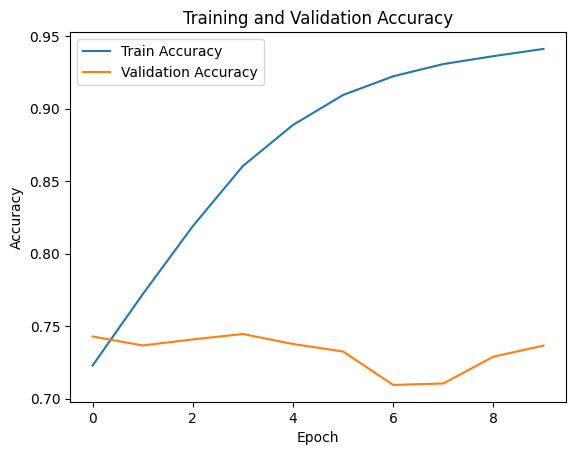

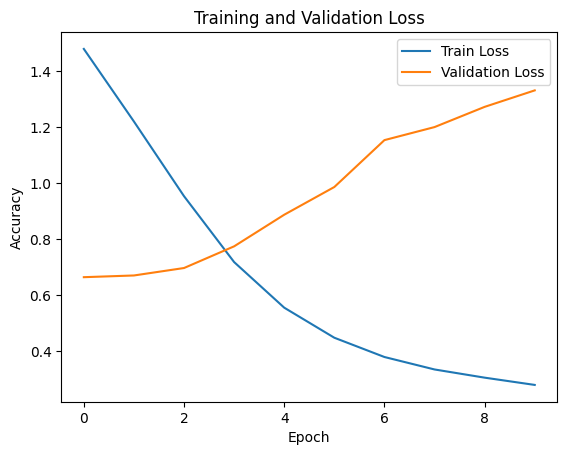

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

* Accuracy: Model is performing well on the training data, with accuracy improving consistently as epochs increase. However, the validation accuracy is not only much lower, but it also declines, which is indicative of overfitting and not generalizing well to the unseen validation data.

* Loss: A good view for overfitting seen in the accuracy graph. The training loss decreases, which is good, but the validation loss increases, suggesting more that model's generalization to new data is poor.

In [ ]:
cnn_model.save('cnn_first.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


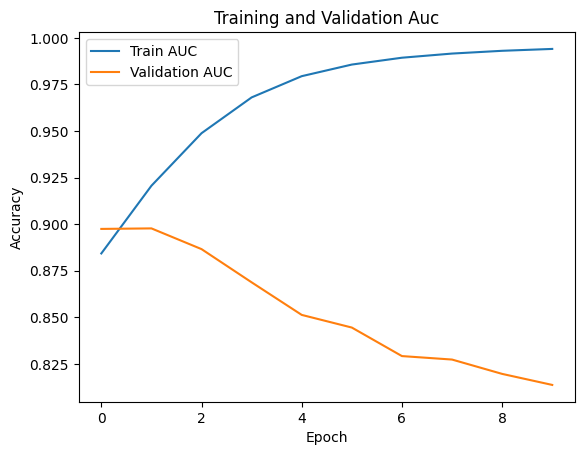

In [ ]:
# Plot training and validation Auc
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Auc')
plt.legend()
plt.show()

Another important metric to consider is the Area Under the Curve (AUC), which is used to evaluate the performance of a classification model. A perfect model would have an AUC value of 1, while a model that performs no better than random guessing would have an AUC value of 0.5. AUC is particularly useful for assessing class imbalance.

During model training, it's common to observe an increase in the training AUC while the validation AUC decreases.

**Model is suffering from overfitting. It's doing an excellent job at learning the training set but is not performing well on the validation set.**

# CNN with Data Augmentation

Synonym Replacement via Keras Data Augmentation Function
The synonym replacement function in Keras facilitates the identification and preprocessing of synonyms for a given word.

* This process involves the same preprocessing steps utilized in previous models, encompassing cleaning procedures. Additionally, it entails the exclusion of any rows containing only a single character.
* Duplicate values are not removed.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [ ]:
df.groupby('overall').describe()

Review                         
          count  unique        top  freq
overall                                 
1         10772    9382  Too small    12
2          9624    8421         Ok    20
3         21470   18288         ok   159
4         45832   36792       good   286
5        283165  204531      great  1718

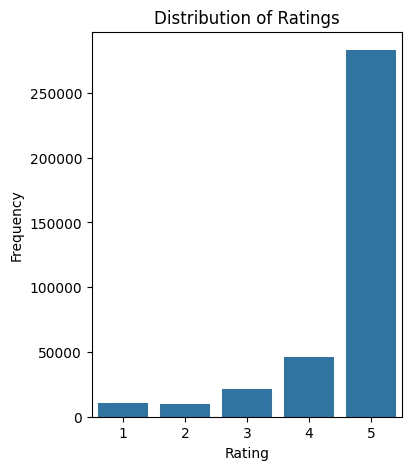

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='overall')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    """Removes HTML tags: replaces anything between opening and closing <> with empty space"""
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    """Cleans text data up, including lemmatization and removing newlines, leaving only
    2 or more char long words composed of A-Z & a-z only in lowercase, without removing stopwords"""

    # Convert to lowercase
    sentence = sen.lower()

    # Explicitly remove newlines
    sentence = sentence.replace('\n', ' ')

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove special characters and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['text'] = df['Review'].apply(preprocess_text)
df_cleaned = df.copy()
# Combine both conditions: remove empty, space-only, and single-char variables
df_cleaned = df_cleaned[df_cleaned['text'].str.strip().str.len() > 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
from nltk.corpus import wordnet
from random import randint

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def replace_synonyms(text):
    words = nltk.word_tokenize(text)
    new_words = words.copy()

    random_word_list = list(set([word for word in words if word not in nltk.corpus.stopwords.words('english')]))
    for random_word in random_word_list:
        synsets = wordnet.synsets(random_word)
        if not synsets:
            continue
        synonym = synsets[0].lemmas()[randint(0, len(synsets[0].lemmas()) - 1)].name()
        new_words = [synonym if word == random_word else word for word in new_words]

    return ' '.join(new_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer

# Assuming df is your DataFrame with 'Review' and 'overall' columns
augmented_texts = []
augmented_ratings = []

for rating in range(1, 5):  # Apply augmentation to classes 1 to 4
    # Extract reviews for the current class
    class_reviews = df_cleaned[df_cleaned['overall'] == rating]['text']

    for review in class_reviews:
        # Apply synonym replacement
        syn_replaced = replace_synonyms(review)

        augmented_texts.append(syn_replaced)
        augmented_ratings.append(rating)

# Create a DataFrame with the augmented texts
df_augmented = pd.DataFrame({'text': augmented_texts, 'overall': augmented_ratings})

# Combine with the original DataFrame
df_combined = pd.concat([df_cleaned, df_augmented]).reset_index(drop=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_combined.overall.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5    282320
4     91498
3     42898
1     21534
2     19236
Name: overall, dtype: int64

In [ ]:
X_train = df_combined['text']
y_train = df_combined['overall']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x7f1dde050160>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nltk/data.py", line 1160, in __del__
    if not self.closed:
  File "/usr/local/lib/python3.10/dist-packages/nltk/data.py", line 1180, in closed
    return self.stream.closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


82268

In [ ]:
print("Second Instance Text Sequence:\n")
print(X_train_seq[1])
print("\nSecond Instance Text Sequence Length:", len(X_train_seq[1]))

Second Instance Text Sequence:

[4, 76, 37, 10, 9, 75, 27, 967, 3351, 15, 4]

Second Instance Text Sequence Length: 11


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Optionally, pad sequences to ensure uniform length
from keras.preprocessing.sequence import pad_sequences
sequence_len = 200
X_train_token = pad_sequences(X_train_seq, padding='post', maxlen=sequence_len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
embedding_dim=100
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_len))
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.losses import CategoricalFocalCrossentropy
loss_function = CategoricalFocalCrossentropy(gamma=2.0, alpha=0.25)

model.compile(
    optimizer='adam',
    loss=loss_function,
    metrics=[
        'accuracy',
        AUC(name='auc', multi_label=True),  # Adjusted for multi-class
        Precision(name='precision'),
        Recall(name='recall')
    ],run_eagerly=False
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          8226800   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class_weights = {
    0: 4,  # Adjusted for Class 1 weight
    1: 5,  # Adjusted for Class 2 weight
    2: 3,  # Adjusted for Class 3 weight
    3: 2,  # Adjusted for Class 4 weight
    4: 1   # Adjusted for Class 5 weight
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_train_one_hot = np.eye(5)[np.array(df_combined['overall']) - 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Implementing early stopping to prevent overfitting by monitoring the validation loss. The training process will terminate if the validation loss fails to improve for a specified number of epochs. Additionally, custom weights will be incorporated into the model initialization.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=2,
                               restore_best_weights=True)

# Fit the model with the early stopping callback
history = model.fit(X_train_token, y_train_one_hot, epochs=5,
                    validation_split=0.2, shuffle=True,
                    batch_size=128, class_weight=class_weights,
                    callbacks=[early_stopping])  # Add early stopping to callback

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/5
2860/2860 [==============================] - 1154s 403ms/step - loss: 0.1769 - accuracy: 0.7714 - auc: 0.8273 - precision: 0.9068 - recall: 0.5779 - val_loss: 0.1835 - val_accuracy: 0.2817 - val_auc: 0.8118 - val_precision: 0.1699 - val_recall: 0.0394
Epoch 2/5
2860/2860 [==============================] - 1137s 397ms/step - loss: 0.1437 - accuracy: 0.7902 - auc: 0.8697 - precision: 0.9070 - recall: 0.6470 - val_loss: 0.1756 - val_accuracy: 0.3132 - val_auc: 0.8221 - val_precision: 0.1399 - val_recall: 0.0349
Epoch 3/5
2860/2860 [==============================] - 1152s 403ms/step - loss: 0.1288 - accuracy: 0.8006 - auc: 0.8851 - precision: 0.9037 - recall: 0.6717 - val_loss: 0.1782 - val_accuracy: 0.3034 - val_auc: 0.8258 - val_precision: 0.1639 - val_recall: 0.0481
Epoch 4/5
2860/2860 [==============================] - 1153s 403ms/step - loss: 0.1176 - accuracy: 0.8093 - auc: 0.8958 - precision: 0.8991 - recall: 0.6917 - val_loss: 0.1766 - val_accuracy: 0.3320 - val_auc: 0.83

At epoch 4 the model was stoped as it starting to overfit ,model shows signs of overfitting, with good training performance but poor validation results. Precision and recall are high on training data but significantly lower on validation data, indicating issues with generalization, AUC is somewhat lower but doesn't show as dramatic a difference as the accuracy.

# CNN with pretrained GloVe Embeddings.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/train.csv')
train.shape

(370863, 2)

In [ ]:
print(train.isnull().sum())
print(train.duplicated().sum())

overall    0
Review     0
dtype: int64
93449


In [ ]:
train.dropna(inplace=True)

In [ ]:
df = train.copy()
df.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s()\\\n]', '', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()

    return text

In [ ]:
X_train = []
for sentence in df['Review'].tolist():
    X_train.append(clean_text(sentence))

In [ ]:
X_train[2]

'this is a great assortment of colors though there are a lot of pinks in the mix still most colors are covered and with all those spools youre probably not going to have a problem finding a color that works for your project i will probably buy this assortment again in the future once ive used most of this one'

In [ ]:
y_train = df['overall'].tolist()
print("reviews : " , len(X_train))
print("ratings : ", len(y_train))

reviews :  370863
ratings :  370863


In [ ]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
# from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
from sklearn.metrics import classification_report, accuracy_score, f1_score

* The Embedding layer requires words to be in numeric form.
* Utilizing the Tokenizer function from the keras.preprocessing.text library.
* The fit_on_text method trains the tokenizer.
* The texts_to_sequences method converts sentences into their numeric representations.
* We'll convert the text into numerical values, where each word will be represented by an array of numbers. The length of the array may vary depending on the chosen GloVe embedding.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# we then pad the sequences so they're all the same length (sequence_length)
#Glove embeddings are available in 4 different lengths. (50,100,200 and 300)

X_train = pad_sequences(X_train, padding='post', maxlen=200)
# X_test = pad_sequences(X_test, padding='post', maxlen=200)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

77011

In [ ]:
import os

embeddings_index = {}
with open('/content/drive/MyDrive/glove.6B.200d.txt','r', encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 200

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(77011, 200)

In [ ]:
# Convert ratings to one-hot encoded vectors
num_classes = 5  # Ratings range from 1 to 5
y_train_one_hot = np.eye(num_classes)[np.array(y_train) - 1]

In [ ]:
# from tensorflow.keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=200,
                    trainable=False))  # Set trainable to False to keep the embeddings fixed
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[
                  'accuracy',
                  tensorflow.keras.metrics.Precision(name='precision'),
                  tensorflow.keras.metrics.Recall(name='recall'),
                  tensorflow.keras.metrics.AUC(name='auc')
              ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          15402200  
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          128128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15538909 (59.28 MB)
Trainable params: 136709 (534.02 KB)
Non-trainable params: 15402200 (58.75 MB)
_________

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          15402200  
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          128128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15538909 (59.28 MB)
Trainable params: 136709 (534.02 KB)
Non-trainable params: 15402200 (58.75 MB)
_________

batch size = 128

no stopwords removed.

embedding dim = 100

max length padding = 200

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=1,            # Stop training after 3 epochs if val_loss does not improve
    verbose=1,             # Print a message when stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [ ]:
# Train the model
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                        validation_split=0.2, verbose=1, shuffle=True,callbacks=[early_stopping]
                    )

Epoch 1/5
2318/2318 [==============================] - 841s 362ms/step - loss: 0.5926 - accuracy: 0.7898 - precision: 0.8558 - recall: 0.7371 - auc: 0.9542 - val_loss: 0.5500 - val_accuracy: 0.8008 - val_precision: 0.8733 - val_recall: 0.7387 - val_auc: 0.9608
Epoch 2/5
2318/2318 [==============================] - 832s 359ms/step - loss: 0.5257 - accuracy: 0.8082 - precision: 0.8667 - recall: 0.7588 - auc: 0.9637 - val_loss: 0.5410 - val_accuracy: 0.8039 - val_precision: 0.8649 - val_recall: 0.7531 - val_auc: 0.9617
Epoch 3/5
2318/2318 [==============================] - 845s 364ms/step - loss: 0.4963 - accuracy: 0.8176 - precision: 0.8698 - recall: 0.7711 - auc: 0.9675 - val_loss: 0.5318 - val_accuracy: 0.8078 - val_precision: 0.8640 - val_recall: 0.7617 - val_auc: 0.9630
Epoch 4/5
2318/2318 [==============================] - 829s 358ms/step - loss: 0.4707 - accuracy: 0.8260 - precision: 0.8718 - recall: 0.7848 - auc: 0.9706 - val_loss: 0.5388 - val_accuracy: 0.8058 - val_precision: 0.

In [ ]:
model.save('cnn_with_glove_embeddings.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
accuracy = history.history['accuracy'][-1]
accuracy

0.8260136842727661

In [ ]:
# Evaluate the model on the validation split
evaluation = model.evaluate(X_train, y_train_one_hot)

# Get the compiled metric names
metric_names = model.metrics_names

# Print the compiled metric names and their corresponding values
for metric_name, metric_value in zip(metric_names, evaluation):
    print(f"{metric_name}: {metric_value}")

11590/11590 [==============================] - 447s 39ms/step - loss: 0.4671 - accuracy: 0.8285 - precision: 0.8801 - recall: 0.7783 - auc: 0.9712
loss: 0.467073917388916
accuracy: 0.8285053968429565
precision: 0.8800568580627441
recall: 0.7782766222953796
auc: 0.971243679523468


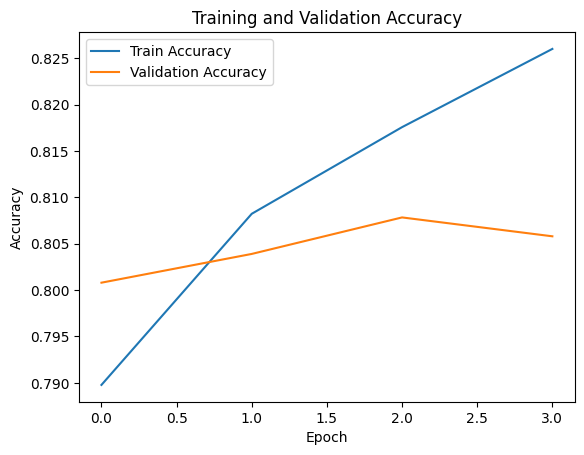

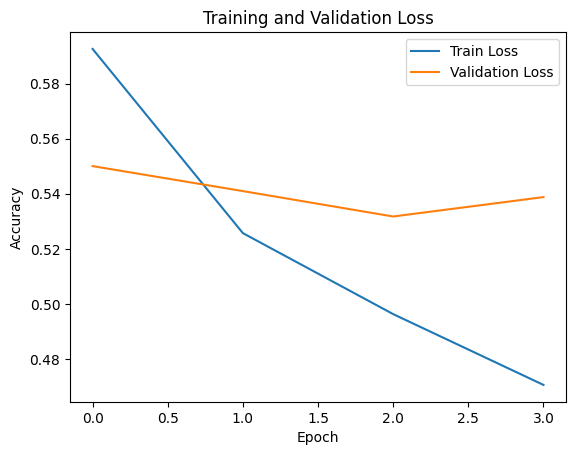

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The model shows positive training and validation accuracy, but a fluctuating validation accuracy indicates difficulty improving performance. Training loss decreases consistently, while validation loss remains stable. The early stopping mechanism halted training at the fourth epoch to prevent overfitting. Precision, recall, and AUC are high, indicating a well-performing model. However, the slight increase in validation loss may indicate overfitting, which early stopping effectively mitigates.

# Multi-Layer Network with flattened Embedding layer

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten

# Step 2: Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['Review'], test_df['Review']], ignore_index=True)

# Step 3: Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['Review'])
test_sequences = tokenizer.texts_to_sequences(test_df['Review'])

max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Step 4: Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    Flatten(),  # Use Flatten to convert the 3D output of Embedding to 2D
    Dropout(0.2),  # Use regular Dropout here
    Dense(256, activation='relu'),
    Dropout(0.5),  # It's common to have a Dropout layer after Dense layers
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val))

# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('/content/drive/MyDrive/submission.csv', index=False)

Epoch 1/3
5216/5216 [==============================] - 482s 92ms/step - loss: 0.5934 - accuracy: 0.7888 - val_loss: 0.5615 - val_accuracy: 0.7925
Epoch 2/3
5216/5216 [==============================] - 484s 93ms/step - loss: 0.5130 - accuracy: 0.8121 - val_loss: 0.5486 - val_accuracy: 0.8037
Epoch 3/3
1159/1159 [==============================] - 10s 9ms/step
              precision    recall  f1-score   support

     Class 1       0.55      0.56      0.55      1091
     Class 2       0.38      0.20      0.27       998
     Class 3       0.41      0.44      0.43      2212
     Class 4       0.52      0.22      0.31      4634
     Class 5       0.87      0.96      0.91     28152

    accuracy                           0.80     37087
   macro avg       0.54      0.48      0.49     37087
weighted avg       0.77      0.80      0.78     37087

Validation Accuracy: 0.8037
3864/3864 [==============================] - 39s 10ms/step


the validation loss decreases initially but then increases in the third epoch, which can be an early sign of overfitting.
The model performs well on this class 5 but struggles with minority classes, especially Class 2 and Class 4, which have notably low recall and F1-scores.
Overall accuracy is high (80%), but this is likely inflated due to the high prevalence of Class 5. The macro average F1-score, which gives equal weight to all classes, is lower (0.49) and more indicative of the model's performance across all classes.
The final validation accuracy matches the last epoch's validation accuracy, confirming that the model's performance is consistent at the end of training.


# Sequence models:

# LSTM with GloVe
remove stopwords

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train= pd.read_csv(r"C:\Users\Renada Ahmed\Desktop\Master studies\Applied Text Analytics\cw2\f20f21-aa-2023-2024-cw2\train.csv")
train.shape

(370863, 2)

In [ ]:
train.head(5)

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370863 entries, 0 to 370862
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  370863 non-null  int64 
 1   Review   370855 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.7+ MB


In [ ]:
print(train.isnull().sum())
print(train.duplicated().sum())

overall    0
Review     8
dtype: int64
93449


In [ ]:
train.dropna(inplace=True)

In [ ]:
train.groupby('overall').describe()

Review                         
          count  unique        top  freq
overall                                 
1         10772    9382  Too small    12
2          9624    8421         Ok    20
3         21470   18288         ok   159
4         45831   36791       good   286
5        283158  204530      great  1718

* Preprocess (lower, tokenization ,remove punctuation, remove stopwords).
* GloVe.
* LSTM model.

In [ ]:
df = train.copy()
df.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [ ]:
df['Review'][2]

"This is a great assortment of colors, though there are a lot of pinks in the mix. Still, most colors are covered, and with all those spools, you're probably not going to have a problem finding a color that works for your project. I will probably buy this assortment again in the future once I've used most of this one."

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# https://colab.research.google.com/drive/1Pa3M_NtsBiHCQ_1A2fudLfEQEyClwDv0#scrollTo=GPSBPltpQDPp

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

[nltk_data] Downloading package punkt to C:\Users\Renada
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Renada
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Renada
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
X_train = []
for sentence in df['Review'].tolist():
    X_train.append(preprocess_text(sentence))

In [ ]:
X_train[2]

'great assortment colors though lot pinks mix still colors covered spools probably going problem finding color works project probably buy assortment future used one '

In [ ]:
x_len = df['Review'].apply(lambda x: len(str(x).split(' ')))
print("min length of sentence: " + str(x_len.min()))
print("mean length of sentence: " + str(x_len.mean()))
print("max length of sentence: " + str(x_len.max()))
print("75th percentile of sentence length:", str(np.percentile(x_len, 75)))

min length of sentence: 1
mean length of sentence: 31.43804451874722
max length of sentence: 3629
75th percentile of sentence length: 36.0


In [ ]:
y_train = df['overall'].tolist()
print("reviews : " , len(X_train))
print("ratings : ", len(y_train))

reviews :  370855
ratings :  370855


In [ ]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
# from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
from sklearn.metrics import classification_report, accuracy_score, f1_score

* The Embedding layer requires input in numerical form.
* Tokenizer function from keras.preprocessing.text library is used.
* Training of the tokenizer is achieved with the fit_on_text method.
* Sentences are transformed into numeric representations using the texts_to_sequences method.
* Each word is encoded as an array of numbers, with lengths depending on the chosen GloVe embedding.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# we then pad the sequences so they're all the same length (sequence_length)
#Glove embeddings are available in 4 different lengths. (50,100,200 and 300)

X_train = pad_sequences(X_train, padding='post', maxlen=200)
# X_test = pad_sequences(X_test, padding='post', maxlen=200)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

49567

In [ ]:
import os

embeddings_index = {}
with open(r"C:\Users\Renada Ahmed\Desktop\Master studies\Applied Text Analytics\cw2\glove.6B.200d.txt\glove.6B.200d.txt",'r', encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 200

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(49567, 200)

In [ ]:
# Convert ratings to one-hot encoded vectors
num_classes = 5  # Ratings range from 1 to 5
y_train_one_hot = np.eye(num_classes)[np.array(y_train) - 1]

* Vocab size: Represents the number of unique words in the training set. For instance, if words are encoded from 0 to 100, the vocab size will be 101.
* Output dim: Denotes the dimension to which each word in the training set will be encoded. This dimension can be chosen based on preferences.
* Input length: Indicates the length of the input sequences. For instance, if all input sequences in your data are of length 100, this value will be 100.
* Adding SpatialDropout1D after the embedding layer: This step helps regularize the input to the LSTM layers by randomly dropping input features. This helps prevent overfitting and encourages better generalization performance of the model on unseen data.

In [ ]:
# from tensorflow.keras.metrics import Precision, Recall, Accuracy

# Define the Sequential model
lstm_model = Sequential()

# Add the Embedding layer with input shape
lstm_model.add(Embedding(input_dim=vocab_size,
                         output_dim=embedding_dim,weights=[embedding_matrix],
                          trainable=False))

# Now set the weights of the Embedding layer
# lstm_model.layers[0].set_weights([embedding_matrix])

lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
                   metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         9913400   
                                                                 
 spatial_dropout1d_1 (Spati  (None, None, 200)         0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 128)               168448    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 10082493 (38.46 MB)
Trainable params: 169093 (660.52 KB)
Non-trainable params: 9913400 (37.82 MB)
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=3,            # Stop training after 3 epochs if val_loss does not improve
    verbose=1,             # Print a message when stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [ ]:
# Train the model
batch_size = 32
epochs = 10
history = lstm_model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                        validation_split=0.2, verbose=1, shuffle=True,callbacks=[early_stopping]
                    )

Epoch 1/10


9272/9272 [==============================] - 3303s 356ms/step - loss: 0.8292 - accuracy: 0.7635 - precision: 0.7638 - recall: 0.7625 - val_loss: 0.8301 - val_accuracy: 0.7631 - val_precision: 0.7633 - val_recall: 0.7628
Epoch 2/10
9272/9272 [==============================] - 3219s 347ms/step - loss: 0.8077 - accuracy: 0.7636 - precision: 0.7721 - recall: 0.7565 - val_loss: 0.6697 - val_accuracy: 0.7679 - val_precision: 0.8276 - val_recall: 0.7362
Epoch 3/10
9272/9272 [==============================] - 3540s 382ms/step - loss: 0.6481 - accuracy: 0.7751 - precision: 0.8429 - recall: 0.7248 - val_loss: 0.6077 - val_accuracy: 0.7832 - val_precision: 0.8490 - val_recall: 0.7422
Epoch 4/10
9272/9272 [==============================] - 4068s 439ms/step - loss: 0.6168 - accuracy: 0.7815 - precision: 0.8537 - recall: 0.7297 - val_loss: 0.5940 - val_accuracy: 0.7879 - val_precision: 0.8569 - val_recall: 0.7397
Epoch 5/10
9272/9272 [==============================] - 3248s 350ms/step -

In [ ]:
lstm_model.save('lstm_with_glove_embeddings.h5')

C:\Users\Renada Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
accuracy = history.history['accuracy'][-1]
accuracy

0.8005015254020691

In [ ]:
# Evaluate the model on the validation split
evaluation = lstm_model.evaluate(X_train, y_train_one_hot)

# Get the compiled metric names
metric_names = lstm_model.metrics_names

# Print the compiled metric names and their corresponding values
for metric_name, metric_value in zip(metric_names, evaluation):
    print(f"{metric_name}: {metric_value}")

11590/11590 [==============================] - 658s 57ms/step - loss: 0.5244 - accuracy: 0.8111 - precision: 0.8734 - recall: 0.7560
loss: 0.5244475603103638
accuracy: 0.811074435710907
precision: 0.8734302520751953
recall: 0.7559773921966553


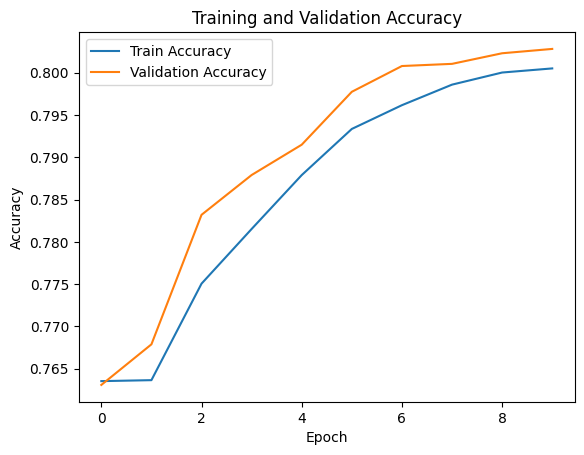

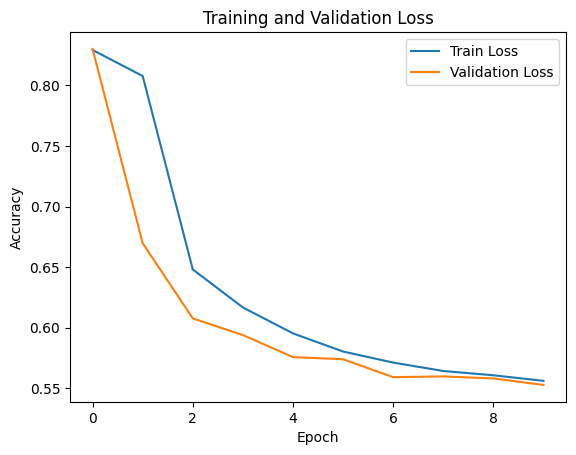

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

* Progression of accuracy and loss for both validation and training is generally positive, indicating less overfitting compared to previous examples.
* Precision, recall, and accuracy metrics show consistency between training and validation, which is a positive sign.
* The model maintains relatively consistent precision and recall throughout training.
* The model achieved a score of 80 on the Kaggle competition.

In [ ]:
## predict
test = pd.read_csv(r"C:\Users\Renada Ahmed\Desktop\Master studies\Applied Text Analytics\cw2\f20f21-aa-2023-2024-cw2\test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123622 entries, 0 to 123621
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      123622 non-null  int64 
 1   Review  123618 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
X_pred = []
for sent in test['Review'].tolist():
    X_pred.append(preprocess_text(str(sent)))

X_pred = tokenizer.texts_to_sequences(X_pred)
X_pred = pad_sequences(X_pred, padding='post', maxlen=200)

In [ ]:
X_pred.shape

(123622, 200)

In [ ]:
predictions = lstm_model.predict(X_pred)
predicted_classes = np.argmax(predictions, axis=1)
original_predicted_classes = predicted_classes + 1

print("Original Predicted Classes:", original_predicted_classes)

3864/3864 [==============================] - 212s 55ms/step
Original Predicted Classes: [5 5 5 ... 5 5 5]


In [ ]:
test['Predicted_Class'] = original_predicted_classes
test

id                                             Review  \
0            0             Wonderful asst. of  wood carving tools   
1            1  Pretty lace with 4 way stretch. I was exactly ...   
2            2  This is a quick and easy way to start a crazy ...   
3            3  This is my favorite journals, the pages are ve...   
4            4  I bought this for a costume i was making. i wa...   
...        ...                                                ...   
123617  123617  I don't know that I can fully express my adora...   
123618  123618  Love this works well with machine. Good packag...   
123619  123619     It is what it is. It works. Made of cardboard.   
123620  123620  Really cool. It's durable, lightweight and ver...   
123621  123621                        Great hammer fro the price.   

        Predicted_Class  
0                     5  
1                     5  
2                     5  
3                     5  
4                     3  
...                 ...  
123617                5  
123618                5  
123619                5  
123620                5  
123621                5  

[123622 rows x 3 columns]

In [ ]:
test.drop(columns=['Review'], inplace=True)
test.rename(columns={'Predicted_Class': 'overall'}, inplace=True)
test.to_csv('lstm+Glove.csv', index=False)

In [ ]:
test.head()

id  overall
0   0        5
1   1        5
2   2        5
3   3        5
4   4        3

# LSTM
* batch size = 64.
* no stopwords removed.
* Embedding dim = 100.

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Step 2: Load the dataset
train_df = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['Review'], test_df['Review']], ignore_index=True)

# Step 3: Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['Review'])
test_sequences = tokenizer.texts_to_sequences(test_df['Review'])

max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Step 4: Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(5, activation='softmax')  # Use 5 neurons for 5 classes
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val))

# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission.csv', index=False)


Epoch 1/3
5216/5216 [==============================] - 718s 137ms/step - loss: 0.5756 - accuracy: 0.7928 - val_loss: 0.5344 - val_accuracy: 0.8022
Epoch 2/3
5216/5216 [==============================] - 698s 134ms/step - loss: 0.5067 - accuracy: 0.8141 - val_loss: 0.5130 - val_accuracy: 0.8130
Epoch 3/3
1159/1159 [==============================] - 17s 15ms/step
              precision    recall  f1-score   support

     Class 1       0.61      0.59      0.60      1091
     Class 2       0.38      0.31      0.34       998
     Class 3       0.50      0.37      0.43      2212
     Class 4       0.52      0.16      0.24      4634
     Class 5       0.86      0.98      0.92     28152

    accuracy                           0.81     37087
   macro avg       0.58      0.48      0.51     37087
weighted avg       0.78      0.81      0.78     37087

Validation Accuracy: 0.8132
3864/3864 [==============================] - 58s 15ms/step


The model's accuracy consistently improves with each epoch, while there is no concurrent increase in validation loss. This indicates effective learning without overfitting within these epochs. Notably, there is a significant increase in precision and recall for Class 1, as well as precision for Class 2. However, the recall for Class 4 remains relatively low. Despite the increase in validation accuracy and improvement in the macro average F1-score, indicating enhanced generalization performance, there are still concerns regarding class imbalance evident in the low recall and F1-scores for certain classes.

trying to see the change when decreasing batch size to 32

In [ ]:

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam


train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['Review'], test_df['Review']], ignore_index=True)

# Step 3: Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['Review'])
test_sequences = tokenizer.texts_to_sequences(test_df['Review'])

max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Step 4: Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(5, activation='softmax')  # Use 5 neurons for 5 classes
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=32, epochs=3, validation_data=(X_val, y_val))

# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission.csv', index=False)


Epoch 1/3
10431/10431 [==============================] - 2025s 194ms/step - loss: 0.5663 - accuracy: 0.7959 - val_loss: 0.5255 - val_accuracy: 0.8082
Epoch 2/3
10431/10431 [==============================] - 1985s 190ms/step - loss: 0.4991 - accuracy: 0.8166 - val_loss: 0.5112 - val_accuracy: 0.8117
Epoch 3/3
1159/1159 [==============================] - 29s 25ms/step
              precision    recall  f1-score   support

     Class 1       0.63      0.56      0.59      1091
     Class 2       0.45      0.19      0.27       998
     Class 3       0.47      0.48      0.47      2212
     Class 4       0.51      0.21      0.30      4634
     Class 5       0.87      0.97      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.59      0.48      0.51     37087
weighted avg       0.78      0.82      0.79     37087

Validation Accuracy: 0.8163
3864/3864 [==============================] - 99s 26ms/step


Reducing the batch size seems to have a positive impact on your model's performance:

Training and Validation Accuracy: There's an incremental improvement across epochs, with the final validation accuracy reaching 81.63%. The smaller batch size may be providing a better estimate of the gradient, potentially leading to more robust learning.

Classification Report Metrics: Precision for Class 1 and Class 3 has improved. There's a slight improvement in recall for Class 3, which is a positive sign. Class 5 continues to show strong performance, which is consistent with its likely status as the majority class.

General Observations: Class 2 and Class 4 still show relatively low performance, particularly with recall.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Tuned Hyperparameters for LSTM with Learning Rate 0.0001

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam


train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['Review'], test_df['Review']], ignore_index=True)

# Step 3: Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['Review'])
test_sequences = tokenizer.texts_to_sequences(test_df['Review'])

max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Step 4: Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(5, activation='softmax')  # Use 5 neurons for 5 classes
])


optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val))

# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission.csv', index=False)


Epoch 1/3
5216/5216 [==============================] - 1278s 244ms/step - loss: 0.6603 - accuracy: 0.7716 - val_loss: 0.6074 - val_accuracy: 0.7782
Epoch 2/3
5216/5216 [==============================] - 1263s 242ms/step - loss: 0.5742 - accuracy: 0.7899 - val_loss: 0.5705 - val_accuracy: 0.7921
Epoch 3/3
1159/1159 [==============================] - 31s 27ms/step
              precision    recall  f1-score   support

     Class 1       0.49      0.61      0.55      1091
     Class 2       0.34      0.03      0.06       998
     Class 3       0.39      0.36      0.38      2212
     Class 4       0.42      0.18      0.25      4634
     Class 5       0.86      0.97      0.91     28152

    accuracy                           0.80     37087
   macro avg       0.50      0.43      0.43     37087
weighted avg       0.75      0.80      0.76     37087

Validation Accuracy: 0.7959
3864/3864 [==============================] - 102s 26ms/step


There is a considerable increase in the recall for Class 1, suggesting that the model is now better at identifying this class. However, Class 2's performance has decreased drastically in terms of recall, which has brought down its F1-score significantly. Classes 3 and 4 have modest recall and F1-scores. Class 5 maintains a high precision and recall, indicating the model's strong performance on this class, likely due to its large representation in the dataset.

 macro average F1-score is lower compared to previous reports, particularly due to the poor performance in Class 2. The weighted average is also slightly lower, reflecting the impact of the model's performance on the minority classes.
 The poor performance in Class 2 could indicate that the learning rate is too low for features associated with this class to be learned effectively within three epochs so a batch size samller is better but for learning rate the smaller it gets the results gets worse.

In [ ]:
K.clear_session()


# BiLSTM (Bidirectional Long Short-Term Memory)
* 2nd highest
* batch size = 64
* embidding dim = 100

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Step 2: Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['Review'], test_df['Review']], ignore_index=True)

# Step 3: Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['Review'])
test_sequences = tokenizer.texts_to_sequences(test_df['Review'])

max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Step 4: Define and compile the neural network model for multi-class classification
# Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),  # Adjusted to Bidirectional LSTM
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Step 5: Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val))

# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission.csv', index=False)


Epoch 1/3
5216/5216 [==============================] - 2346s 449ms/step - loss: 0.5706 - accuracy: 0.7938 - val_loss: 0.5309 - val_accuracy: 0.8046
Epoch 2/3
5216/5216 [==============================] - 2326s 446ms/step - loss: 0.5040 - accuracy: 0.8145 - val_loss: 0.5168 - val_accuracy: 0.8093
Epoch 3/3
1159/1159 [==============================] - 55s 47ms/step
              precision    recall  f1-score   support

     Class 1       0.62      0.59      0.60      1091
     Class 2       0.43      0.23      0.30       998
     Class 3       0.50      0.35      0.41      2212
     Class 4       0.49      0.20      0.29      4634
     Class 5       0.86      0.98      0.92     28152

    accuracy                           0.81     37087
   macro avg       0.58      0.47      0.50     37087
weighted avg       0.77      0.81      0.78     37087

Validation Accuracy: 0.8140
3864/3864 [==============================] - 180s 47ms/step


In [ ]:
model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
5216/5216 [==============================] - 2306s 442ms/step - loss: 0.4519 - accuracy: 0.8351 - val_loss: 0.5070 - val_accuracy: 0.8162
Epoch 2/3
5216/5216 [==============================] - 2369s 454ms/step - loss: 0.4306 - accuracy: 0.8435 - val_loss: 0.5109 - val_accuracy: 0.8185
Epoch 3/3
5216/5216 [==============================] - 2302s 441ms/step - loss: 0.4117 - accuracy: 0.8506 - val_loss: 0.5256 - val_accuracy: 0.8179


In [ ]:
# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission_retrained.csv', index=False)


1159/1159 [==============================] - 57s 49ms/step
              precision    recall  f1-score   support

     Class 1       0.57      0.64      0.60      1091
     Class 2       0.40      0.33      0.36       998
     Class 3       0.50      0.41      0.45      2212
     Class 4       0.52      0.24      0.33      4634
     Class 5       0.88      0.97      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.57      0.52      0.53     37087
weighted avg       0.79      0.82      0.79     37087

Validation Accuracy: 0.8179
3864/3864 [==============================] - 182s 47ms/step


training accuracy increased from 82.61% to 85.06%, and the validation accuracy also improved from 81.40% to 81.79%.
Loss: While the training loss continued to decrease, which is good, the validation loss slightly increased in the final epoch. This might indicate the start of overfitting.
the additional training epochs have provided some benefits, particularly in improving the model's ability to recognize Classes 1, 2, and 3. However, the rise in validation loss suggests you should monitor for overfitting.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning + BiLSTM
Embedding dim = 300

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s()\\\n]', '', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()

    return text

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Step 2: Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

train_df['text'] =train_df['Review'].apply(clean_text)
test_df['text'] =test_df['Review'].apply(clean_text)

# Ensure no null entries in 'Review'
train_df.dropna(subset=['Review'], inplace=True)
test_df.dropna(subset=['Review'], inplace=True)

# Combine train and test data for consistent tokenization
all_reviews = pd.concat([train_df['text'], test_df['text']], ignore_index=True)

# Step 3: Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(all_reviews)
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

max_sequence_length = 300
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

y_train = train_df['overall'].values - 1  # Adjust labels to start from 0

# Step 4: Define and compile the neural network model for multi-class classification
# Define and compile the neural network model for multi-class classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),  # Adjusted to Bidirectional LSTM
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Step 5: Train the model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model.fit(X_train_split, y_train_split, batch_size=64, epochs=3, validation_data=(X_val, y_val))

# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('submission.csv', index=False)


Epoch 1/3
5216/5216 [==============================] - 6248s 1s/step - loss: 0.5722 - accuracy: 0.7945 - val_loss: 0.5427 - val_accuracy: 0.8021
Epoch 2/3
5216/5216 [==============================] - 6292s 1s/step - loss: 0.5047 - accuracy: 0.8143 - val_loss: 0.5098 - val_accuracy: 0.8130
Epoch 3/3
1159/1159 [==============================] - 142s 122ms/step
              precision    recall  f1-score   support

     Class 1       0.61      0.61      0.61      1091
     Class 2       0.40      0.23      0.30       998
     Class 3       0.47      0.42      0.45      2212
     Class 4       0.48      0.24      0.32      4634
     Class 5       0.88      0.97      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.57      0.49      0.52     37087
weighted avg       0.78      0.82      0.79     37087

Validation Accuracy: 0.8151
3864/3864 [==============================] - 472s 122ms/step


The training and validation accuracies have shown improvement over the epochs.
Loss: The loss is decreasing for both training and validation sets, which is a positive sign. The validation loss at the end of the third epoch is lower than the initial model's, indicating an effective learning process without immediate signs of overfitting.

Precision and recall for Class 1 have remained stable, maintaining an F1-score of around 0.61. Class 2 saw a slight improvement in precision and recall. Classes 3 and 4 saw marginal increases in their metrics, but the improvements are modest. Class 5 continues to score high in all metrics.

The increase in step time per epoch could be due to the larger embedding dimension which requires more computation. Larger embeddings can capture more nuanced relationships between words but at the cost of increased computational resources and potentially longer training times.

In [ ]:
model.fit(X_train_split, y_train_split, batch_size=64, epochs=1, validation_data=(X_val, y_val))


5216/5216 [==============================] - 6383s 1s/step - loss: 0.4517 - accuracy: 0.8347 - val_loss: 0.5082 - val_accuracy: 0.8170


In [ ]:
# Step 6: Evaluate on validation set
predictions = model.predict(X_val)
val_predicted_classes = np.argmax(predictions, axis=-1)

# Calculate precision, recall, f1-score, and support
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_val, val_predicted_classes, target_names=class_names)
print(report)

# Optional: Calculate and print accuracy
accuracy = accuracy_score(y_val, val_predicted_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Step 7: Make predictions on the test data
test_predictions = model.predict(X_test)
test_predicted_classes = np.argmax(test_predictions, axis=-1) + 1  # Adjusting back to original label range

# Prepare the submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'overall': test_predicted_classes})
submission_df.to_csv('bilstm_text_300.csv', index=False)


1159/1159 [==============================] - 141s 121ms/step
              precision    recall  f1-score   support

     Class 1       0.64      0.57      0.60      1091
     Class 2       0.38      0.27      0.32       998
     Class 3       0.49      0.44      0.46      2212
     Class 4       0.50      0.21      0.30      4634
     Class 5       0.87      0.98      0.92     28152

    accuracy                           0.82     37087
   macro avg       0.58      0.49      0.52     37087
weighted avg       0.78      0.82      0.79     37087

Validation Accuracy: 0.8170
3864/3864 [==============================] - 473s 122ms/step


With an additional epoch:

Training Accuracy,It has increased to 83.47%,Validation Accuracy also increased to 81.70%,

The macro average F1-score has remained stable, which means that across all classes, the performance is about the same on average. The weighted average has also stayed the same, which is not unusual considering that the majority class (Class 5) has a strong influence on this metric due to its larger support.










In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 300, 128)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1379461 (5.26 MB)
Trainable params: 1379461 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
